# Groundwater Constituent Regression Analysis

In [127]:
require(dplyr)
require(readxl)
require(moderndive)
require(ggplot2)
require(chemCal)

### Import and view data: ###

In [128]:
X20b_data <- structure(list(date = structure(c(1617807900, 1622638800, 
1628069100, 1632839400, 1652187300, 1654530900, 1659519000, 1664985300, 
1681563300, 1686230700, 1690973700, 1696265100), class = c("POSIXct", 
"POSIXt"), tzone = "UTC"), antimony = c(0.0116, 0.0131, 0.0136, 
0.0124, 0.0107, 0.0112, 0.011, 0.0107, 0.0115, 0.00971, 0.00938, 
0.00882), arsenic = c(0.125, 0.142, 0.161, 0.172, 0.193, 0.186, 
0.183, 0.173, 0.17, 0.165, 0.139, 0.132), fluoride = c(7.94, 
8.75, 8.99, 9.13, 7.28, 5.62, 7.22, 7.31, 5.58, 7.86, 6.94, 6.96
), pH = c(11.03, 10.7, 10.77, 11.1, 10.77, 10.7, 10.95, 10.74, 
10.9, 10.6, 10.46, 11.7), sample = c(1, 2, 3, 4, 5, 6, 7, 8, 
9, 10, 11, 12)), class = c("tbl_df", "tbl", "data.frame"), row.names = c(NA, 
-12L))
str(X20b_data)

tibble [12 × 6] (S3: tbl_df/tbl/data.frame)
 $ date    : POSIXct[1:12], format: "2021-04-07 15:05:00" "2021-06-02 13:00:00" ...
 $ antimony: num [1:12] 0.0116 0.0131 0.0136 0.0124 0.0107 0.0112 0.011 0.0107 0.0115 0.00971 ...
 $ arsenic : num [1:12] 0.125 0.142 0.161 0.172 0.193 0.186 0.183 0.173 0.17 0.165 ...
 $ fluoride: num [1:12] 7.94 8.75 8.99 9.13 7.28 5.62 7.22 7.31 5.58 7.86 ...
 $ pH      : num [1:12] 11 10.7 10.8 11.1 10.8 ...
 $ sample  : num [1:12] 1 2 3 4 5 6 7 8 9 10 ...


### Build linear model for antimony: ###

In [129]:
ols_antimony <- lm(antimony ~ sample, X20b_data)
coef(ols_antimony)

(Intercept)        sample 
 0.0133240909 -0.0003356294

In [130]:
get_regression_table(ols_antimony)

term,estimate,std_error,statistic,p_value,lower_ci,upper_ci
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
intercept,0.013,0.001,26.550,0.000,0.012,0.014
sample,0.000,0.000,-4.922,0.001,0.000,0.000


### Plot residuals: ###

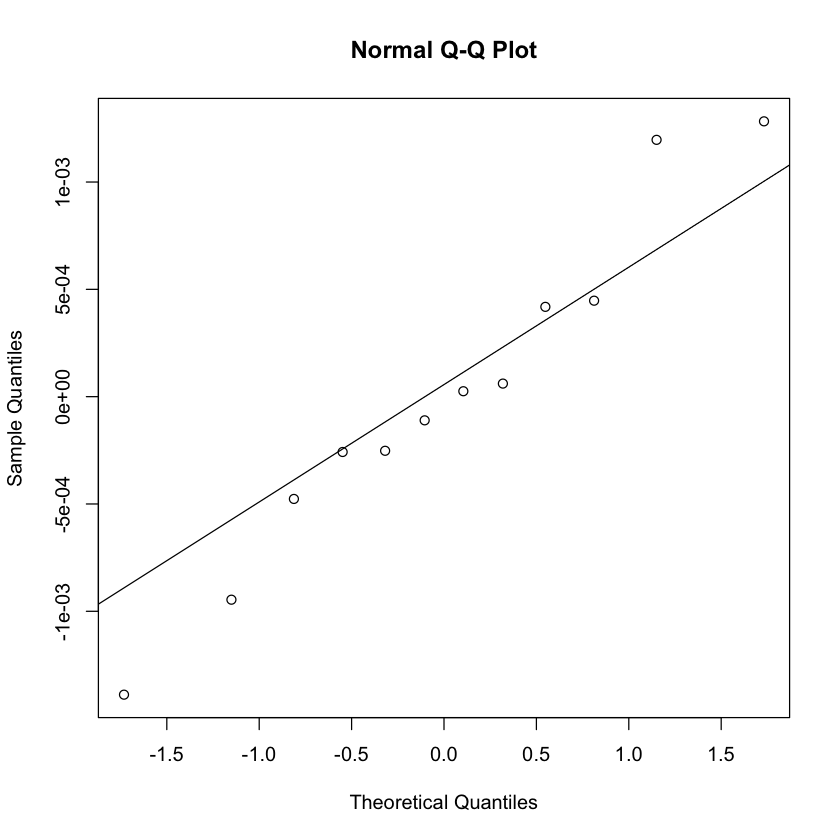

In [131]:
antimony_residuals <- resid(ols_antimony)
qqnorm(antimony_residuals)
qqline(antimony_residuals)

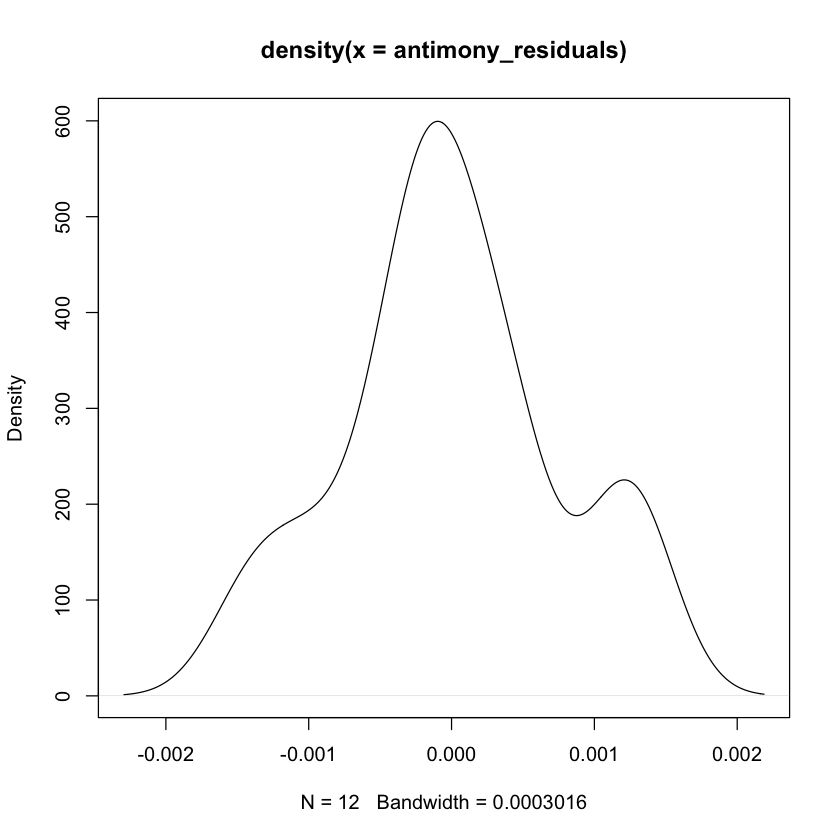

In [132]:
plot(density(antimony_residuals))

### Return prediction for y = 0.006 - antimony Groundwater Protection Standard (GWPS): ###

In [133]:
inverse.predict(ols_antimony, 0.006)

$Prediction
[1] 21.82196

$`Standard Error`
[1] -4.010456

$Confidence
[1] -8.935853

$`Confidence Limits`
[1] 30.75781 12.88611

### Build linear model for fluoride: ###

In [134]:
ols_fluoride <- lm(fluoride ~ sample, X20b_data)
coef(ols_fluoride)

(Intercept)      sample 
  8.6250000  -0.1784615

In [135]:
get_regression_table(ols_fluoride)

term,estimate,std_error,statistic,p_value,lower_ci,upper_ci
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
intercept,8.625,0.621,13.888,0.000,7.241,10.009
sample,-0.178,0.084,-2.115,0.061,-0.366,0.010


### Plot residuals: ###

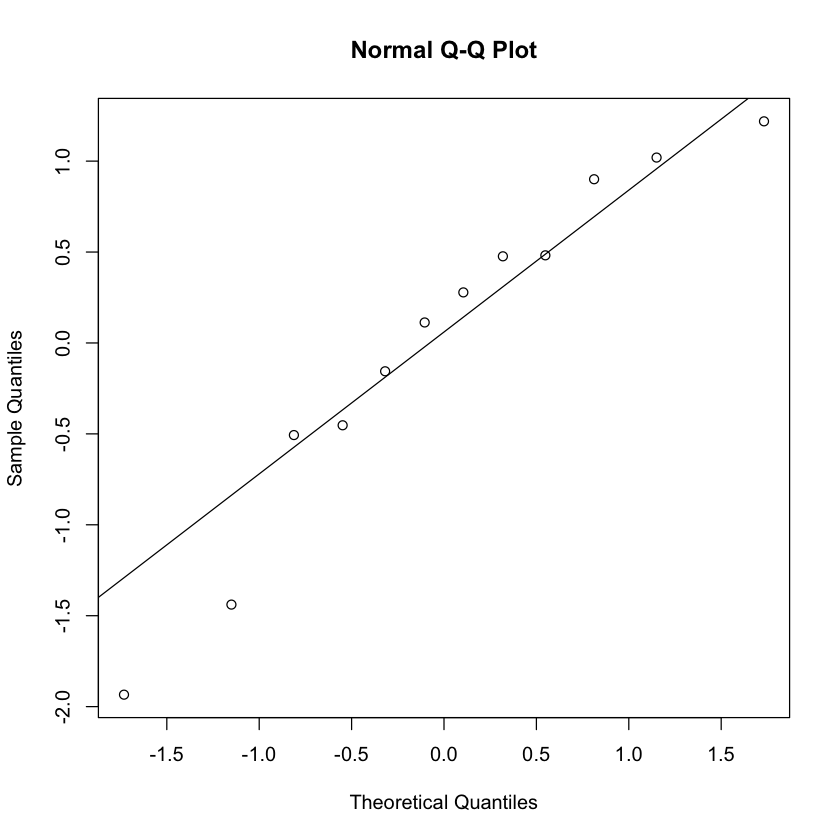

In [136]:
fluoride_residuals <- resid(ols_fluoride)
qqnorm(fluoride_residuals)
qqline(fluoride_residuals)

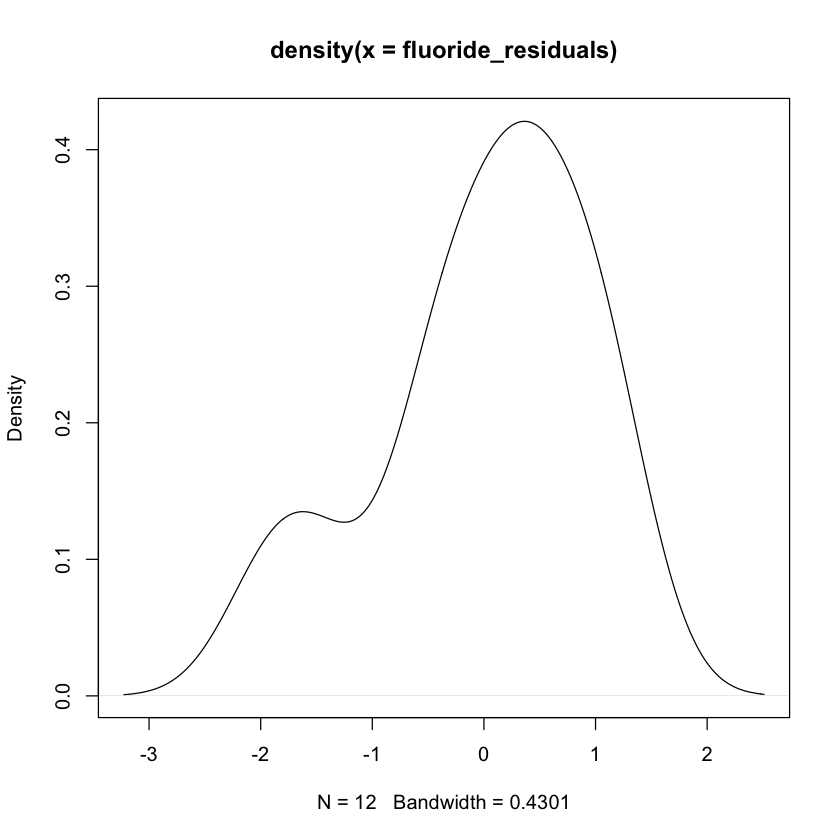

In [137]:
plot(density(fluoride_residuals))

### Return prediction for y = 4 (fluoride GWPS): ###

In [138]:
inverse.predict(ols_fluoride, 4)

$Prediction
[1] 25.91595

$`Standard Error`
[1] -10.90509

$Confidence
[1] -24.29805

$`Confidence Limits`
[1] 50.213995  1.617901

### Plot OLS regression line for antimony and fluoride: ###

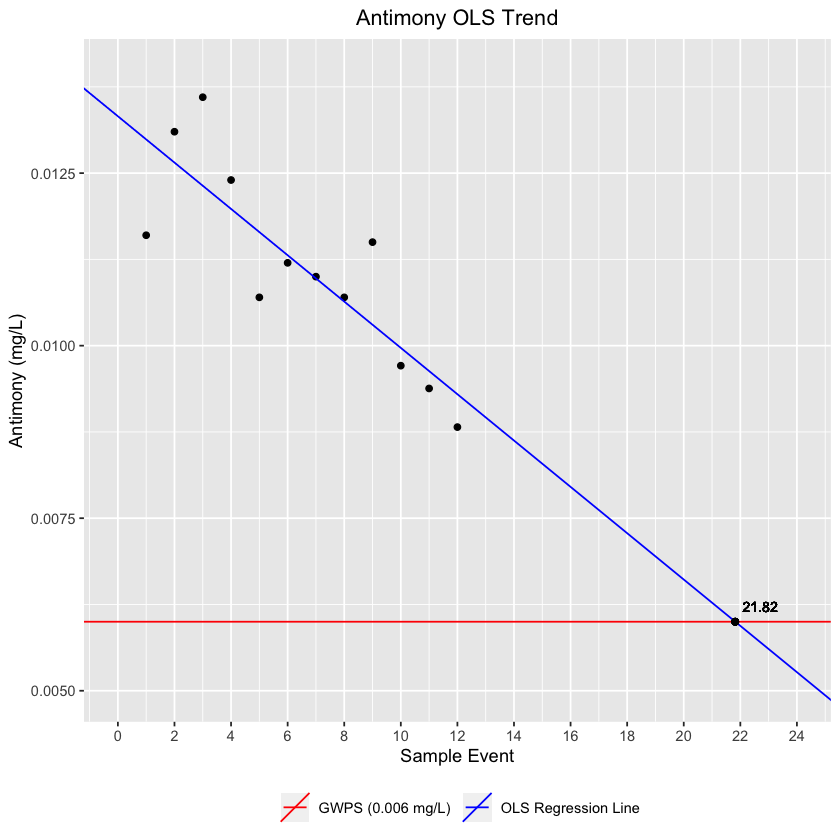

In [139]:
ggplot(X20b_data, aes(sample, antimony)) + geom_point() +
  geom_abline(aes(slope = -0.0003356294, intercept = 0.0133240909, color = "OLS Regression Line")) +
  ylim(0.005, 0.014) +
  scale_x_continuous(breaks=seq(0,24,by=2), limits = c(0, 24)) +
  geom_hline(aes(yintercept=0.006, color = "GWPS (0.006 mg/L)")) +
  ggtitle("Antimony OLS Trend") + 
  ylab("Antimony (mg/L)") +
  xlab("Sample Event") +
  scale_color_manual(name = element_blank(), values=c("red", "blue")) +
  theme(legend.position = "bottom", plot.title = element_text(size = 13, hjust = 0.5)) +
  geom_point(aes(21.82, 0.006)) +
  geom_text(aes(21.82, 0.006), label = "21.82", size = 3, hjust = -0.2, vjust = -1)

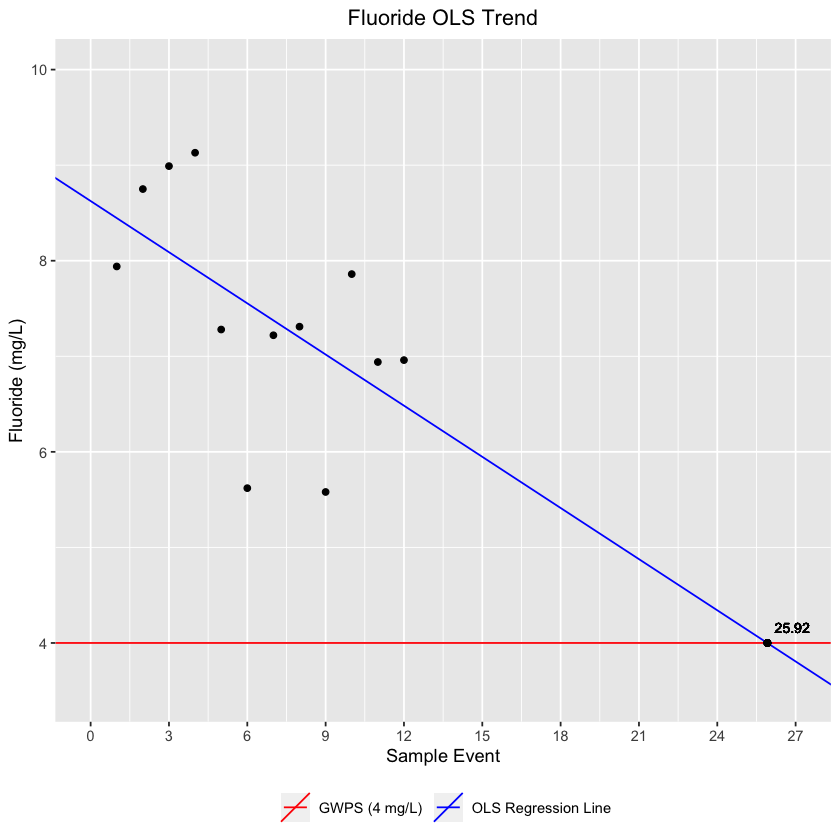

In [140]:
ggplot(X20b_data, aes(sample, fluoride)) + geom_point() +
  geom_abline(aes(slope = -0.1784615, intercept = 8.6250000, color = "OLS Regression Line")) +
  ylim(3.5, 10) +
  scale_x_continuous(breaks=seq(0,27,by=3), limits = c(0, 27)) +
  geom_hline(aes(yintercept=4, color = "GWPS (4 mg/L)")) +
  ggtitle("Fluoride OLS Trend") + 
  ylab("Fluoride (mg/L)") +
  xlab("Sample Event") +
  scale_color_manual(name = element_blank(), values=c("red", "blue")) +
  theme(legend.position = "bottom", plot.title = element_text(size = 13, hjust = 0.5)) +
  geom_point(aes(25.92, 4)) +
  geom_text(aes(25.92, 4), label = "25.92", size = 3, hjust = -0.2, vjust = -1)